Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64
29


c:\Users\s546907\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


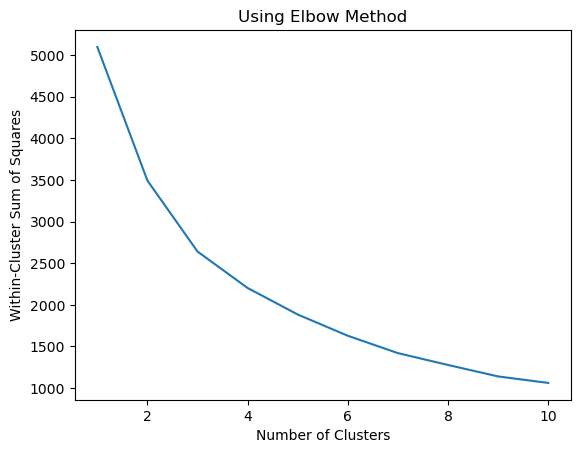

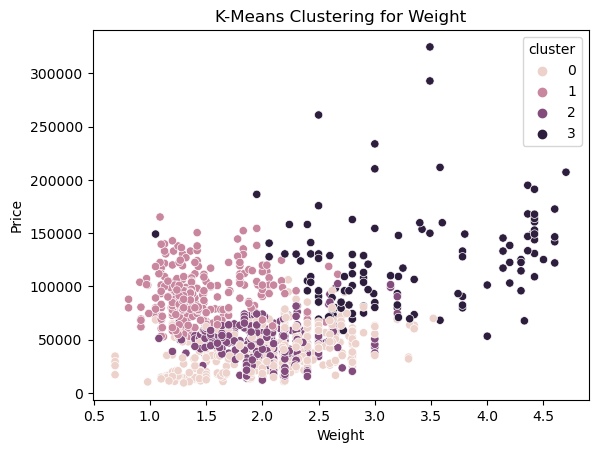

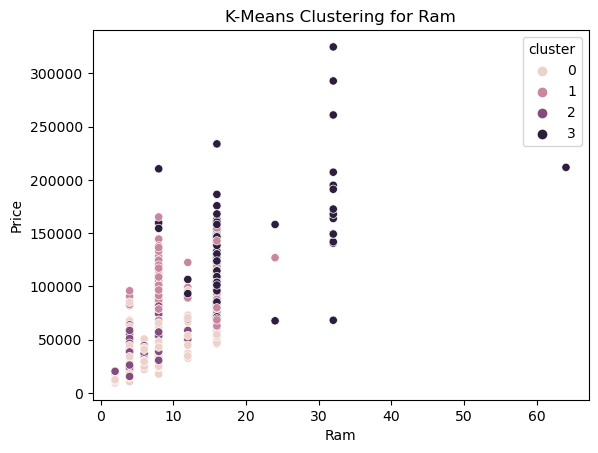

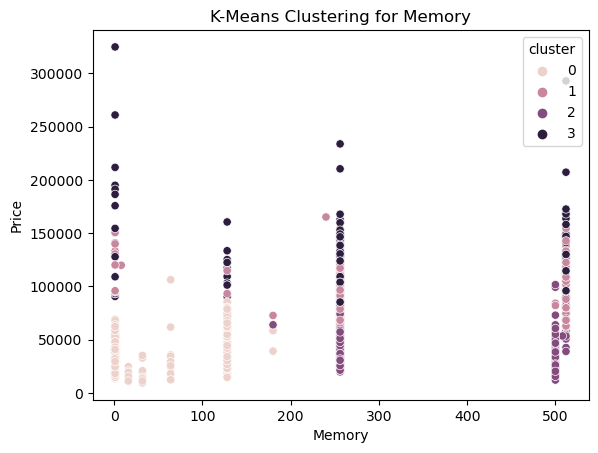

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns


url = 'https://raw.githubusercontent.com/jaichandm/personal/main/laptop_data_cleaned.csv'
laptop_df = pd.read_csv(url)

print(laptop_df.isnull().sum())
laptop_df = laptop_df.dropna()

print(laptop_df.duplicated().sum())

laptop_df = laptop_df.drop_duplicates()

laptop_df['Ram'] = laptop_df['Ram'].str.extract('(\d+)').astype(float)

laptop_df['Memory'] = laptop_df['Memory'].str.extract('(\d+)').astype(float)

laptop_df['Weight'] = laptop_df['Weight'].str.replace('kg', '').astype(float)

X = laptop_df[['Weight', 'Ram', 'Memory', 'Price']]

# X_encode = laptop_df[['Company']]
# one_hot_en = OneHotEncoder()
# X_encoded = one_hot_en.fit_transform(X_encode)
# X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=one_hot_en.get_feature_names(['Company']))
# X_one_hot_en = pd.concat([X, X_encoded_df], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    clusterMeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusterMeans.fit(X_scaled)
    wcss.append(clusterMeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Using Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

clusterMeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusterMeans.fit(X_scaled)

laptop_df['cluster'] = clusterMeans.labels_


for x in ['Weight', 'Ram', 'Memory']:
    sns.scatterplot(data=laptop_df, x=x, y='Price', hue='cluster')
    plt.title(f'K-Means Clustering for {x}')
    plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X = laptop_df[['Weight', 'Ram', 'Memory', 'cluster']]
y = laptop_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

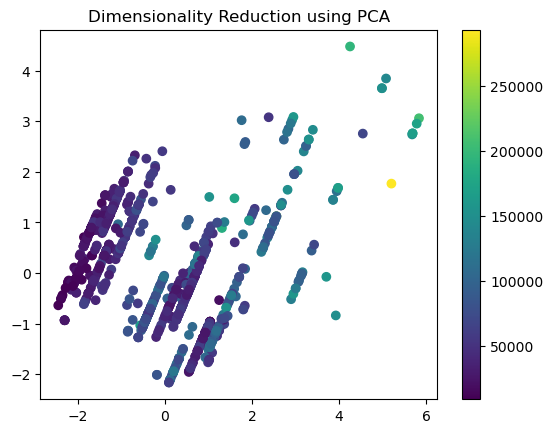

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.colorbar()
plt.title('Dimensionality Reduction using PCA')
plt.show()

The reduced data scatterplot demonstrates a difference between the various price ranges but also significant overlap between the groups. This shows that there may be other significant elements, such as the brand or the specific model, that affect the price in addition to the laptop's specifications (weight, RAM, and memory).
Overall, the analysis's findings suggest to the chance for segmenting the laptop market into different types based on their features and price ranges, which can be helpful for marketing and product development. When making forecasts or conclusions based on statistics, it is crucial to keep in mind that there may be additional factors that have an impact on laptop costs as well.

In [11]:
import numpy as np
laptop_df = laptop_df.dropna()
z_scores = np.abs((laptop_df - laptop_df.mean()) / laptop_df.std())

outliers = z_scores > 3

print(outliers.sum())

Company              0
Cpu                  0
Gpu                  0
Inches               4
Memory               0
OpSys                0
Price               12
Ram                 21
ScreenResolution     0
TypeName             0
Weight              33
cluster              0
dtype: int64


C:\Users\s546907\AppData\Local\Temp\ipykernel_6276\1533987153.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((laptop_df - laptop_df.mean()) / laptop_df.std())


* The dataset has no missing values. However, even if the missing data were included, there might still be anomalous data in the dataset, such as outliers or extreme values that differ markedly from the rest of the data. Such abnormal data must be explored for because they can significantly affect the interpretation and modeling of the data.
* Visualizing the data using different plots, such as scatter plots, histograms, or box plots, and searching for any values that are noticeably beyond the range of the other data are a few ways to look for anomalous data. Another option is to employ statistical techniques, such as computing Z-scores or locating data points that deviate from the mean by more than a predetermined amount of standard deviation.
* To decide what is regarded anomalous or not, it is also crucial to take into account the context of the data and the precise goals of our research. For instance, an extreme value might occasionally be a legitimate data point that accurately captures a rare occurrence, while other times it might be an error or an outlier that needs to be eliminated.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest metrics:')
print('Mean Squared Error: ', mse_rf)
print('R-squared: ', r2_rf)

Random Forest metrics:
Mean Squared Error:  437812243.6557855
R-squared:  0.7445181932376219


The R-squared score for the random forest model is 0.7445, and its mean squared error is 437,812,243.66. The fact that the R-squared value is high suggests that the model fits the data reasonably well. The mean squared error, on the other hand, is extremely big, demonstrating that the model is still missing a sizable portion of the data's variability. It's vital to remember that tweaking hyperparameters or experimenting with other models can help the model perform even better.

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 10), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
print("MLP Regressor R2 score:", r2_score(y_test, y_pred_mlp))
print("MLP Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))

MLP Regressor R2 score: 0.5899996008357362
MLP Regressor RMSE: 26506.726786897776


c:\Users\s546907\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The MLP Regressor model has a Root Mean Squared Error (RMSE) of 26506.73 and an R2 score of 0.5899.
According to the R2 score, the model can account for about 59% of the variance in the target variable. Despite the low score, this model outperforms models that forecast the target variable's mean value. The RMSE calculates the discrepancy between the actual data and the predictions. Because the RMSE is so significant in this instance, there is space for improvement in the model.
We can try the following to enhance the model's performance:
Feature selection, hyperparameter tuning Change up the model.
